In [1]:
import sys
import os

# adiciona a pasta raiz ao path
root_path = os.path.abspath("..")
sys.path.append(root_path)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.cleaning import load_raw, clean_data, basic_aggregations

sns.set_theme(style="whitegrid")


In [2]:
df_raw = load_raw("../data/raw/2025_OrcamentoDespesa.csv")

df = clean_data(df_raw)

df.head()


,exercicio,codigo_orgao_superior,nome_orgao_superior,codigo_orgao_subordinado,nome_orgao_subordinado,codigo_unidade_orcamentaria,nome_unidade_orcamentaria,codigo_funcao,nome_funcao,codigo_subfuncao,...,nome_elemento_de_despesa,orcamento_inicial_(r$),orcamento_atualizado_(r$),orcamento_empenhado_(r$),orcamento_realizado_(r$),%_realizado_do_orcamento_(com_relacao_ao_orcamento_atualizado),codigo_grupo_de_despesa_float,nome_grupo_de_despesa_float,codigo_elemento_de_despesa_float,nome_elemento_de_despesa_float
0,2025,13000,Justiça Militar,13000,Justiça Militar - Unidades com vínculo direto,13101,JUSTICA MILITAR,2,Judiciária,61,...,Outros Serviços de Terceiros - Pessoa Jurídica,"0,00","0,00","21311,65","4390,64","0,00%",3.0,NaN,39.0,NaN
1,2025,20000,Presidência da República,20101,Presidência da República,20101,PRESIDENCIA DA REPUBLICA,4,Administração,122,...,Despesas de Exercícios Anteriores,"599,94","599,94","599,94","599,94","100,00%",3.0,NaN,92.0,NaN
2,2025,20000,Presidência da República,20116,Fundo de Imprensa Nacional,20927,FUNDO DE IMPRENSA NACIONAL,9,Previdência social,272,...,Não informado,"29758974,00","0,00","0,00","0,00","0,00%",1.0,NaN,0.0,NaN
3,2025,20000,Presidência da República,20101,Presidência da República,20101,PRESIDENCIA DA REPUBLICA,28,Encargos especiais,846,...,Não informado,"980631,00","767189,00","0,00","0,00","0,00%",3.0,NaN,0.0,NaN
4,2025,20000,Presidência da República,20101,Presidência da República,20118,AGENCIA BRASILEIRA DE INTELIGENCIA - ABIN,6,Segurança pública,122,...,Vencimentos e Vantagens Fixas - Pessoal Militar,"120000,00","120000,00","120000,00","0,00","0,00%",1.0,NaN,12.0,NaN


In [3]:
# ==============================
# EXPLORAÇÃO INICIAL DO DATASET
# ==============================

# Mostra o tamanho do dataframe (linhas, colunas)
df.shape

# Mostra tipos de dados de cada coluna
df.dtypes

# Mostra estatísticas básicas
df.describe(include="all")

# Verifica valores ausentes
df.isna().sum()


exercicio                                                             0
codigo_orgao_superior                                                 0
nome_orgao_superior                                                   0
codigo_orgao_subordinado                                              0
nome_orgao_subordinado                                                0
codigo_unidade_orcamentaria                                           0
nome_unidade_orcamentaria                                             0
codigo_funcao                                                         0
nome_funcao                                                           0
codigo_subfuncao                                                      0
nome_subfuncao                                                        0
codigo_programa_orcamentario                                          0
nome_programa_orcamentario                                            0
codigo_acao                                                     

In [4]:
# ============================================================
# CONVERSÃO DE COLUNAS PARA NÚMERICO (FORMATO BRASILEIRO)
# ============================================================

# Lista das colunas de valores
cols_valores = [
    "orcamento_inicial_(r$)",
    "orcamento_atualizado_(r$)",
    "orcamento_empenhado_(r$)",
    "orcamento_realizado_(r$)"
]

# Converte: remove pontos de milhar, troca vírgula por ponto e transforma em float
for col in cols_valores:
    df[col] = (
        df[col]
        .str.replace('.', '', regex=False)   # remove pontos (milhares)
        .str.replace(',', '.', regex=False)  # troca vírgula por ponto
        .astype(float)
    )

df[cols_valores].head()


,orcamento_inicial_(r$),orcamento_atualizado_(r$),orcamento_empenhado_(r$),orcamento_realizado_(r$)
0,0.00,0.00,21311.65,4390.64
1,599.94,599.94,599.94,599.94
2,29758974.00,0.00,0.00,0.00
3,980631.00,767189.00,0.00,0.00
4,120000.00,120000.00,120000.00,0.00


In [5]:
# ============================================================
# ANÁLISE 1 — ORÇAMENTO POR ÓRGÃO SUPERIOR (R$ Atualizado)
# ============================================================

# 1. Agrupa por órgão superior somando o orçamento atualizado
# Isso mostra quanto cada órgão realmente tem para trabalhar em 2025
orc_por_orgao = (
    df.groupby("nome_orgao_superior")["orcamento_atualizado_(r$)"]
    .sum()
    .sort_values(ascending=False)
)

# 2. Exibe os 10 maiores órgãos em orçamento
orc_por_orgao.head(10)


nome_orgao_superior
Ministério da Fazenda                                                           3.213591e+12
Ministério da Previdência Social                                                1.052583e+12
Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome    2.911010e+11
Ministério da Saúde                                                             2.487946e+11
Ministério da Educação                                                          2.352684e+11
Ministério da Defesa                                                            1.339972e+11
Ministério do Trabalho e Emprego                                                1.219274e+11
Ministério de Minas e Energia                                                   8.400753e+10
Ministério da Integração e do Desenvolvimento Regional                          4.436913e+10
Presidência da República                                                        4.016273e+10
Name: orcamento_atualizado_(r$), dtype: float64

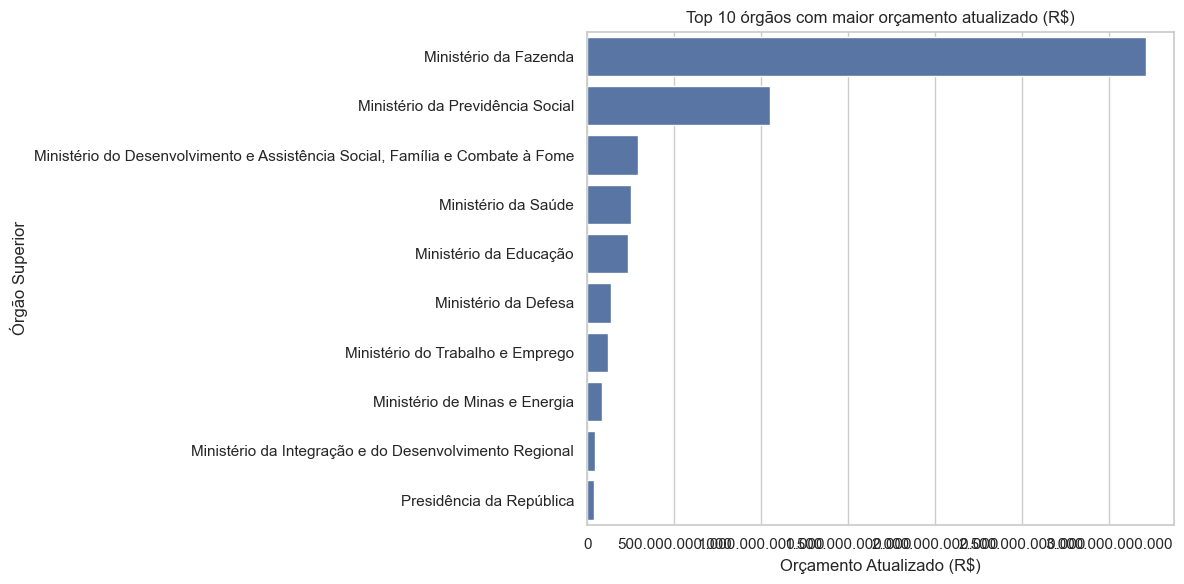

In [6]:
# ============================================================
# GRÁFICO — TOP 10 ÓRGÃOS COM MAIOR ORÇAMENTO ATUALIZADO
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona os 10 maiores órgãos
top10 = orc_por_orgao.head(10)

plt.figure(figsize=(12, 6))

sns.barplot(
    x=top10.values,
    y=top10.index,
    orient='h'
)

plt.title("Top 10 órgãos com maior orçamento atualizado (R$)")
plt.xlabel("Orçamento Atualizado (R$)")
plt.ylabel("Órgão Superior")

# Formatação de números grandes
plt.gca().xaxis.set_major_formatter(lambda x, _: f"{x:,.0f}".replace(",", "."))

plt.tight_layout()
plt.show()


In [7]:
# ============================================================
# ANÁLISE 2 — CONSOLIDAR DADOS POR ÓRGÃO
# ============================================================

colunas = [
    "orcamento_atualizado_(r$)",
    "orcamento_empenhado_(r$)",
    "orcamento_realizado_(r$)"
]

# Agrupamento
execucao_orgao = df.groupby("nome_orgao_superior")[colunas].sum()

# Ordenar pelo orçamento atualizado
execucao_orgao = execucao_orgao.sort_values("orcamento_atualizado_(r$)", ascending=False)

execucao_orgao.head(10)


,orcamento_atualizado_(r$),orcamento_empenhado_(r$),orcamento_realizado_(r$)
nome_orgao_superior,,,
Ministério da Fazenda,3.213591e+12,2.708328e+12,2.499623e+12
Ministério da Previdência Social,1.052583e+12,8.817741e+11,8.467259e+11
"Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome",2.911010e+11,2.641695e+11,2.414056e+11
Ministério da Saúde,2.487946e+11,2.120781e+11,1.899334e+11
Ministério da Educação,2.352684e+11,2.160191e+11,1.650862e+11
Ministério da Defesa,1.339972e+11,1.221804e+11,9.669160e+10
Ministério do Trabalho e Emprego,1.219274e+11,1.062553e+11,1.058913e+11
Ministério de Minas e Energia,8.400753e+10,5.639662e+10,4.852430e+10
Ministério da Integração e do Desenvolvimento Regional,4.436913e+10,3.635478e+10,2.781597e+10


In [8]:
execucao_orgao["percentual_execucao"] = (
    execucao_orgao["orcamento_realizado_(r$)"] /
    execucao_orgao["orcamento_atualizado_(r$)"]
) * 100

execucao_orgao.head(10)


,orcamento_atualizado_(r$),orcamento_empenhado_(r$),orcamento_realizado_(r$),percentual_execucao
nome_orgao_superior,,,,
Ministério da Fazenda,3.213591e+12,2.708328e+12,2.499623e+12,77.782881
Ministério da Previdência Social,1.052583e+12,8.817741e+11,8.467259e+11,80.442696
"Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome",2.911010e+11,2.641695e+11,2.414056e+11,82.928467
Ministério da Saúde,2.487946e+11,2.120781e+11,1.899334e+11,76.341457
Ministério da Educação,2.352684e+11,2.160191e+11,1.650862e+11,70.169305
Ministério da Defesa,1.339972e+11,1.221804e+11,9.669160e+10,72.159440
Ministério do Trabalho e Emprego,1.219274e+11,1.062553e+11,1.058913e+11,86.847790
Ministério de Minas e Energia,8.400753e+10,5.639662e+10,4.852430e+10,57.761852
Ministério da Integração e do Desenvolvimento Regional,4.436913e+10,3.635478e+10,2.781597e+10,62.692169


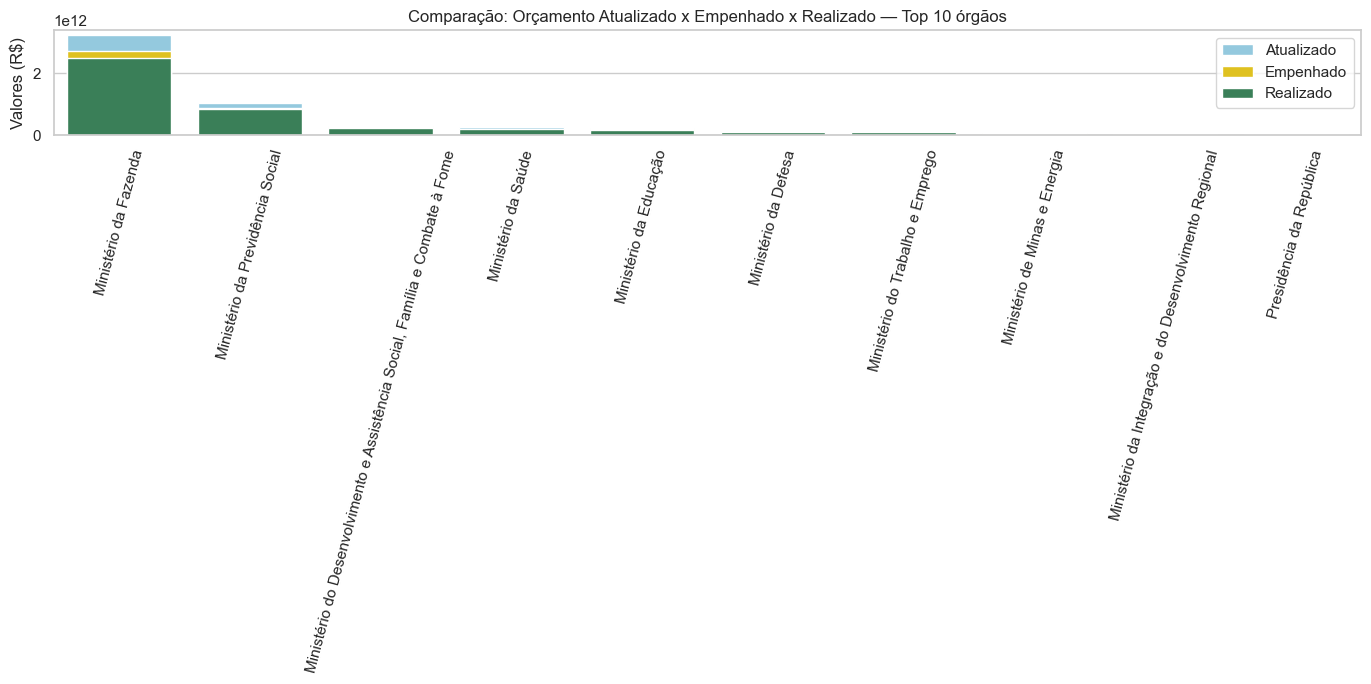

In [9]:
# ============================================================
# GRÁFICO — COMPARAÇÃO ENTRE ATUALIZADO × EMPENHADO × REALIZADO
# PARA OS 10 MAIORES ÓRGÃOS
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar os 10 maiores órgãos por orçamento atualizado
top10_execucao = execucao_orgao.sort_values("orcamento_atualizado_(r$)", ascending=False).head(10)

# Resetar índice para facilitar o gráfico
top10_execucao = top10_execucao.reset_index()

plt.figure(figsize=(14, 7))

# Plotar barras agrupadas
sns.barplot(
    data=top10_execucao,
    x="nome_orgao_superior",
    y="orcamento_atualizado_(r$)",
    color="skyblue",
    label="Atualizado"
)

sns.barplot(
    data=top10_execucao,
    x="nome_orgao_superior",
    y="orcamento_empenhado_(r$)",
    color="gold",
    label="Empenhado"
)

sns.barplot(
    data=top10_execucao,
    x="nome_orgao_superior",
    y="orcamento_realizado_(r$)",
    color="seagreen",
    label="Realizado"
)

plt.xticks(rotation=75)
plt.ylabel("Valores (R$)")
plt.xlabel("")
plt.title("Comparação: Orçamento Atualizado x Empenhado x Realizado — Top 10 órgãos")
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
# ============================================================
# RECRIAR orc_por_orgao  (soma por órgão)
# ============================================================

orc_por_orgao = df.groupby("nome_orgao_superior").agg({
    "orcamento_atualizado_(r$)": "sum",
    "orcamento_empenhado_(r$)": "sum",
    "orcamento_realizado_(r$)": "sum"
})

# ============================================================
# ORDENAR E PEGAR APENAS TOP 10
# ============================================================

orc_top10 = orc_por_orgao.sort_values("orcamento_atualizado_(r$)", ascending=False).head(10)

# ============================================================
# CALCULAR PERCENTUAL DE EXECUÇÃO
# ============================================================

orc_top10["percentual_execucao"] = (
    orc_top10["orcamento_realizado_(r$)"] /
    orc_top10["orcamento_atualizado_(r$)"] * 100
)


C:\Users\Lucas\AppData\Local\Temp\ipykernel_12092\2299415423.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


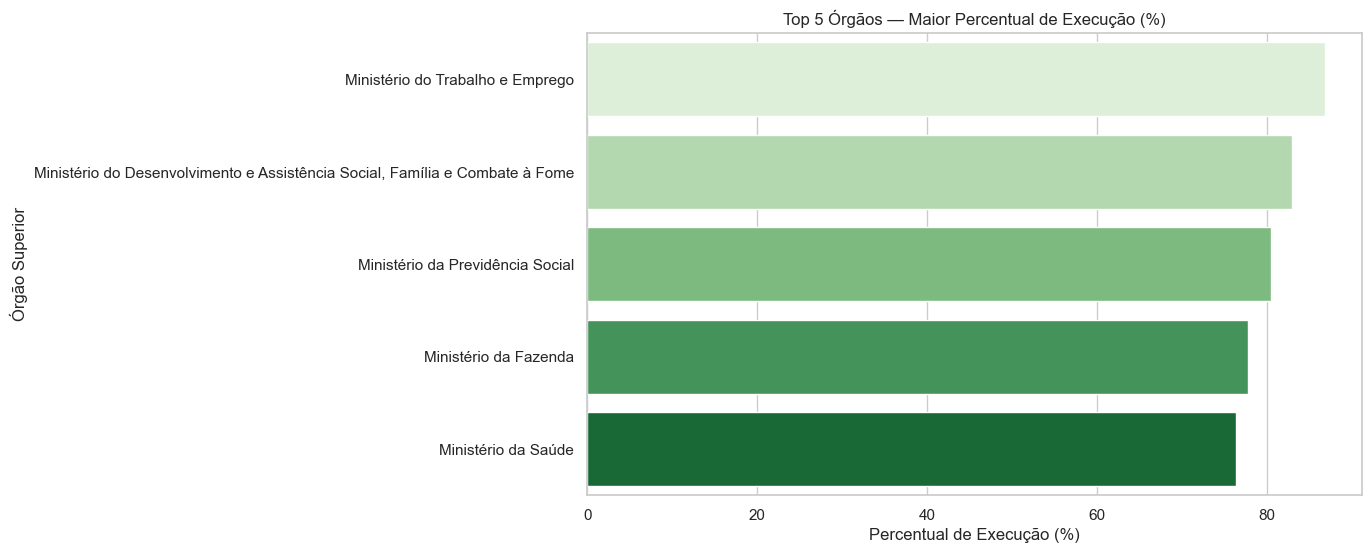

In [11]:
# ============================================================
# GRÁFICO — TOP 5 MAIORES PERCENTUAIS DE EXECUÇÃO
# ============================================================

top5_maiores = orc_top10.nlargest(5, "percentual_execucao")

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_maiores,
    x="percentual_execucao",
    y=top5_maiores.index,
    palette="Greens"
)

plt.title("Top 5 Órgãos — Maior Percentual de Execução (%)")
plt.xlabel("Percentual de Execução (%)")
plt.ylabel("Órgão Superior")

plt.show()



C:\Users\Lucas\AppData\Local\Temp\ipykernel_12092\4227719214.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


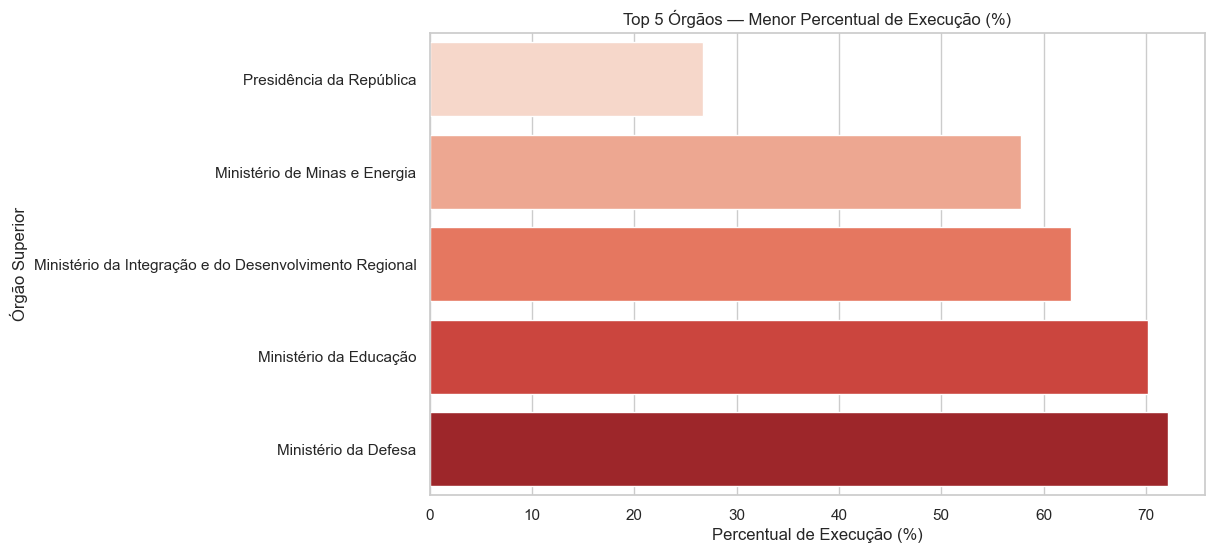

In [12]:
# ============================================================
# GRÁFICO — TOP 5 MENORES PERCENTUAIS DE EXECUÇÃO
# ============================================================

top5_menores = orc_top10.nsmallest(5, "percentual_execucao")

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_menores,
    x="percentual_execucao",
    y=top5_menores.index,
    palette="Reds"
)

plt.title("Top 5 Órgãos — Menor Percentual de Execução (%)")
plt.xlabel("Percentual de Execução (%)")
plt.ylabel("Órgão Superior")

plt.show()


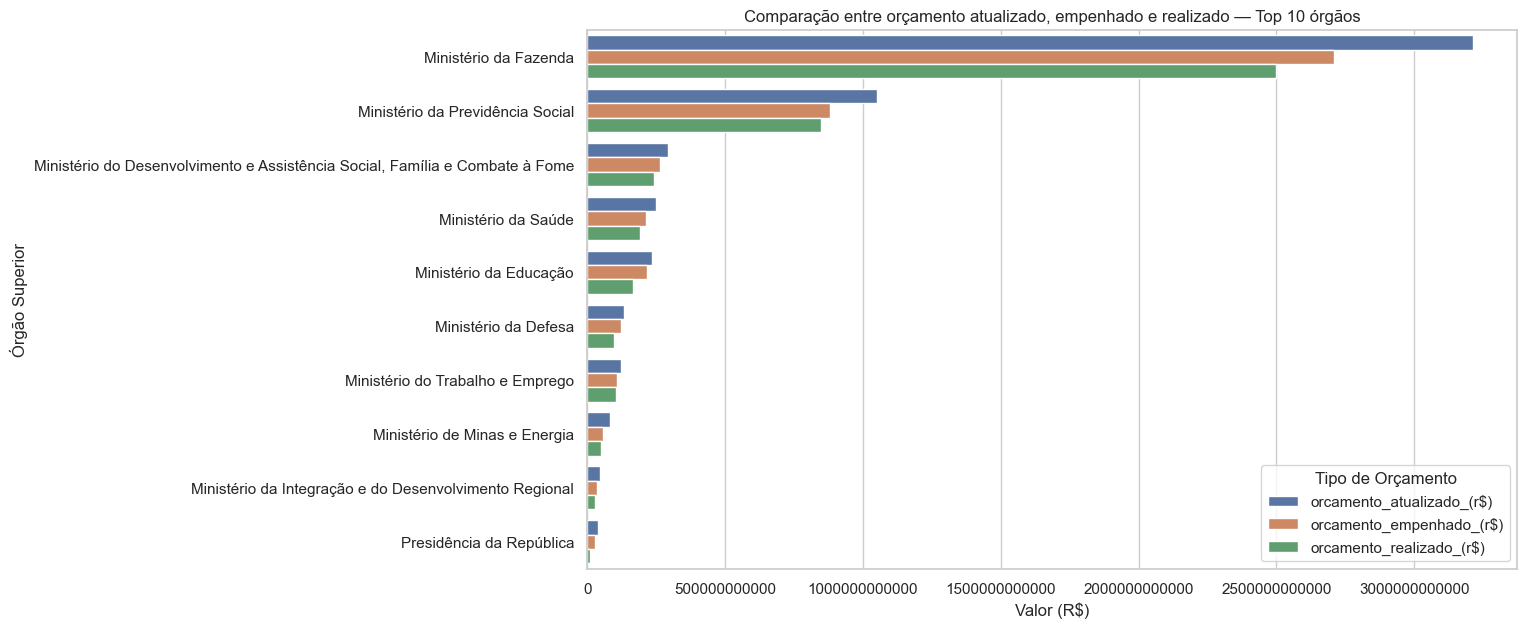

In [13]:
# ============================================================
# ANÁLISE 4 — COMPARAÇÃO ENTRE ORÇAMENTO ATUALIZADO, EMPENHADO E REALIZADO
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Usa os mesmos TOP 10 órgãos que já estávamos usando
df_comp = orc_top10[[
    "orcamento_atualizado_(r$)",
    "orcamento_empenhado_(r$)",
    "orcamento_realizado_(r$)"
]]

# Ajusta o tamanho
plt.figure(figsize=(12, 7))

# Deixa o DataFrame no formato "longo" para facilitar o gráfico
df_long = df_comp.reset_index().melt(
    id_vars="nome_orgao_superior",
    var_name="tipo_orcamento",
    value_name="valor"
)

# Gráfico
sns.barplot(
    data=df_long,
    x="valor",
    y="nome_orgao_superior",
    hue="tipo_orcamento"
)

plt.title("Comparação entre orçamento atualizado, empenhado e realizado — Top 10 órgãos")
plt.xlabel("Valor (R$)")
plt.ylabel("Órgão Superior")
plt.legend(title="Tipo de Orçamento")
plt.ticklabel_format(style='plain', axis='x')

plt.show()


In [14]:
# ============================================================
# RECONSTRUÇÃO DO DATAFRAME por órgão, incluindo percentual
# ============================================================

orc_por_orgao = df.groupby("nome_orgao_superior")[[
    "orcamento_atualizado_(r$)",
    "orcamento_empenhado_(r$)",
    "orcamento_realizado_(r$)"
]].sum()

# Criar o percentual de execução
orc_por_orgao["percentual_execucao"] = (
    orc_por_orgao["orcamento_realizado_(r$)"] /
    orc_por_orgao["orcamento_atualizado_(r$)"] * 100
)


In [15]:
# ============================================================
# ANÁLISE 5 — RANKING COMPLETO DE EFICIÊNCIA NA EXECUÇÃO
# (percentual de execução do maior para o menor)
# ============================================================

ranking_execucao = orc_por_orgao.sort_values(
    "percentual_execucao",
    ascending=False
)

ranking_execucao.head(15)  # Exibir os 15 mais eficientes


,orcamento_atualizado_(r$),orcamento_empenhado_(r$),orcamento_realizado_(r$),percentual_execucao
nome_orgao_superior,,,,
Justiça Militar,0.000000e+00,2.131165e+04,4.390640e+03,inf
Ministério do Trabalho e Emprego,1.219274e+11,1.062553e+11,1.058913e+11,86.847790
"Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome",2.911010e+11,2.641695e+11,2.414056e+11,82.928467
Ministério da Previdência Social,1.052583e+12,8.817741e+11,8.467259e+11,80.442696
Ministério das Relações Exteriores,5.276038e+09,4.534788e+09,4.237940e+09,80.324286
Ministério da Fazenda,3.213591e+12,2.708328e+12,2.499623e+12,77.782881
Banco Central do Brasil - Orçamento Fiscal e Seguridade Social,4.677845e+09,3.734010e+09,3.606010e+09,77.086998
Ministério da Gestão e da Inovação em Serviços Públicos,3.058120e+10,2.653204e+10,2.336493e+10,76.402918
Ministério da Saúde,2.487946e+11,2.120781e+11,1.899334e+11,76.341457


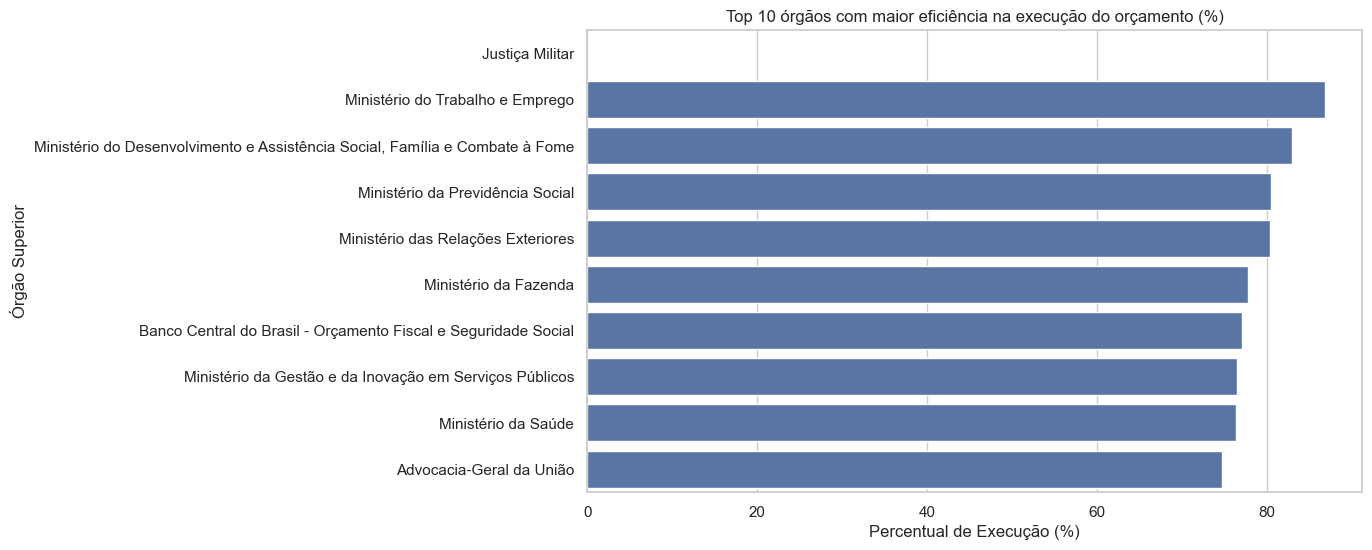

In [16]:
top10_eficientes = ranking_execucao.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_eficientes,
    x="percentual_execucao",
    y=top10_eficientes.index
)
plt.title("Top 10 órgãos com maior eficiência na execução do orçamento (%)")
plt.xlabel("Percentual de Execução (%)")
plt.ylabel("Órgão Superior")
plt.show()


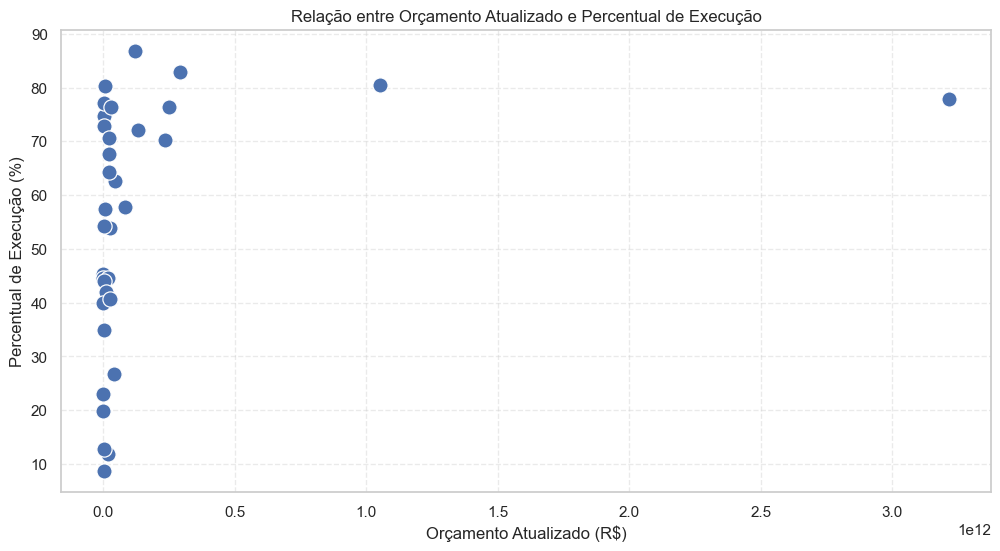

In [17]:
# ============================================================
# ANÁLISE 6 — Dispersão: orçamento x eficiência
# ============================================================

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=orc_por_orgao,
    x="orcamento_atualizado_(r$)",
    y="percentual_execucao",
    s=120
)

plt.title("Relação entre Orçamento Atualizado e Percentual de Execução")
plt.xlabel("Orçamento Atualizado (R$)")
plt.ylabel("Percentual de Execução (%)")

plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


In [18]:
import numpy as np

orc_por_orgao = orc_por_orgao.replace([np.inf, -np.inf], np.nan)
orc_por_orgao = orc_por_orgao.dropna(subset=["percentual_execucao"])


In [19]:
# Substitui infinito por NaN
orc_por_orgao = orc_por_orgao.replace([np.inf, -np.inf], np.nan)

# Remove linhas com NaN no percentual
orc_por_orgao = orc_por_orgao.dropna(subset=["percentual_execucao"])

orc_por_orgao[["orcamento_atualizado_(r$)", "percentual_execucao"]].describe()


,orcamento_atualizado_(r$),percentual_execucao
count,3.500000e+01,35.000000
mean,1.630392e+11,54.571921
std,5.624226e+11,22.405955
min,2.027247e+08,8.721923
25%,3.324446e+09,41.392166
50%,1.709645e+10,57.322933
75%,4.226593e+10,73.750787
max,3.213591e+12,86.847790


In [20]:
# ============================================================
# ANÁLISE 7 — Correlação entre orçamento e eficiência
# ============================================================

correlacao = orc_por_orgao["orcamento_atualizado_(r$)"].corr(
    orc_por_orgao["percentual_execucao"]
)

correlacao


np.float64(0.29183053446539997)

In [22]:
# ============================================================
# ANÁLISE 5 — RANKING COMPLETO DE EFICIÊNCIA NA EXECUÇÃO
# ============================================================

ranking_execucao = orc_por_orgao.sort_values(
    "percentual_execucao",
    ascending=False
)

ranking_execucao


,orcamento_atualizado_(r$),orcamento_empenhado_(r$),orcamento_realizado_(r$),percentual_execucao
nome_orgao_superior,,,,
Ministério do Trabalho e Emprego,1.219274e+11,1.062553e+11,1.058913e+11,86.847790
"Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome",2.911010e+11,2.641695e+11,2.414056e+11,82.928467
Ministério da Previdência Social,1.052583e+12,8.817741e+11,8.467259e+11,80.442696
Ministério das Relações Exteriores,5.276038e+09,4.534788e+09,4.237940e+09,80.324286
Ministério da Fazenda,3.213591e+12,2.708328e+12,2.499623e+12,77.782881
Banco Central do Brasil - Orçamento Fiscal e Seguridade Social,4.677845e+09,3.734010e+09,3.606010e+09,77.086998
Ministério da Gestão e da Inovação em Serviços Públicos,3.058120e+10,2.653204e+10,2.336493e+10,76.402918
Ministério da Saúde,2.487946e+11,2.120781e+11,1.899334e+11,76.341457
Advocacia-Geral da União,5.045330e+09,4.885263e+09,3.767386e+09,74.670739


C:\Users\Lucas\AppData\Local\Temp\ipykernel_12092\3732688798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


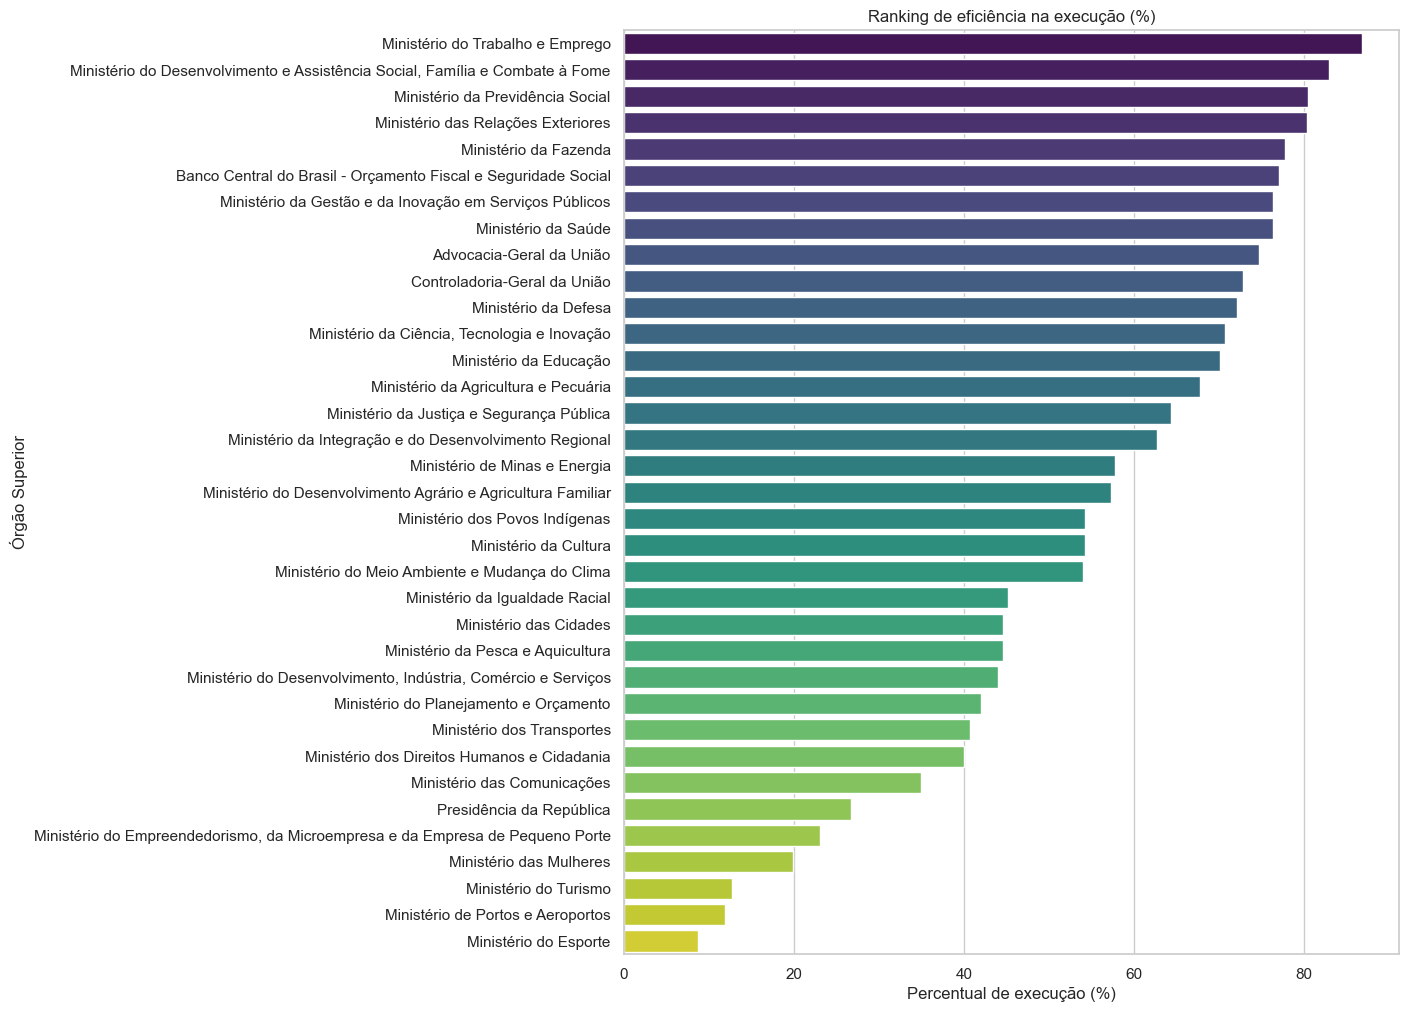

In [23]:
plt.figure(figsize=(10, 12))
sns.barplot(
    data=ranking_execucao,
    x="percentual_execucao",
    y=ranking_execucao.index,
    palette="viridis"
)
plt.title("Ranking de eficiência na execução (%)")
plt.xlabel("Percentual de execução (%)")
plt.ylabel("Órgão Superior")
plt.show()


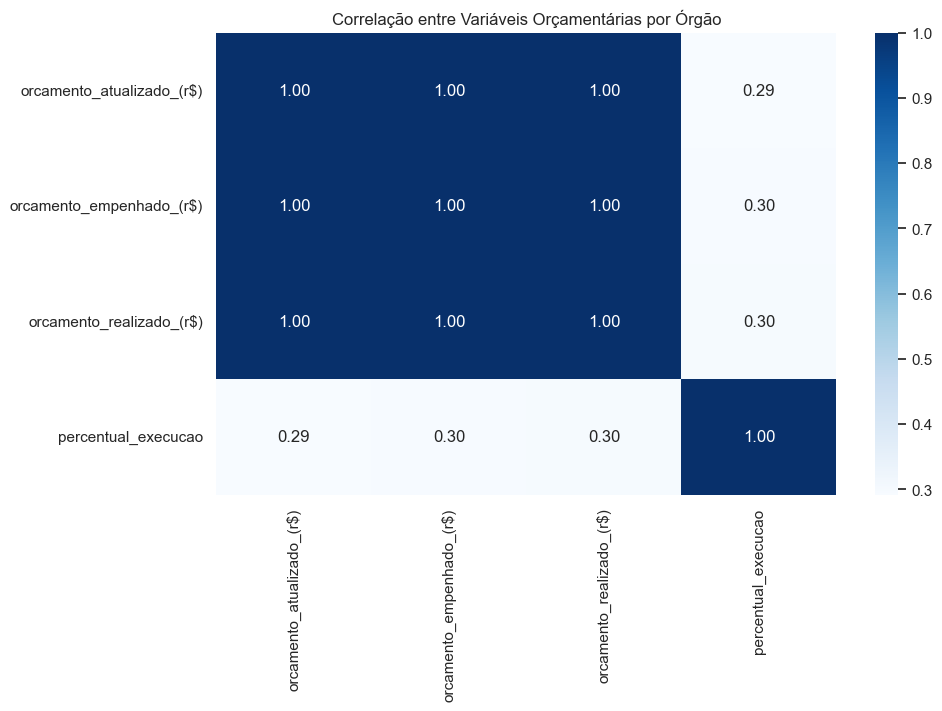

In [24]:
# ============================================================
# ANÁLISE 7 — HEATMAP DE CORRELAÇÃO ENTRE VARIÁVEIS
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas relevantes
cols_corr = [
    "orcamento_atualizado_(r$)",
    "orcamento_empenhado_(r$)",
    "orcamento_realizado_(r$)",
    "percentual_execucao"
]

df_corr = orc_por_orgao[cols_corr].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlação entre Variáveis Orçamentárias por Órgão")
plt.show()


In [25]:
# ============================================================
# ANÁLISE 8 — Órgãos com execução atípica (alta ou baixa)
# ============================================================

# Ordenar pelos extremos
melhores = orc_por_orgao.sort_values("percentual_execucao", ascending=False).head(10)
piores = orc_por_orgao.sort_values("percentual_execucao").head(10)

melhores, piores


(                                                    orcamento_atualizado_(r$)  \
 nome_orgao_superior                                                             
 Ministério do Trabalho e Emprego                                 1.219274e+11   
 Ministério do Desenvolvimento e Assistência Soc...               2.911010e+11   
 Ministério da Previdência Social                                 1.052583e+12   
 Ministério das Relações Exteriores                               5.276038e+09   
 Ministério da Fazenda                                            3.213591e+12   
 Banco Central do Brasil - Orçamento Fiscal e Se...               4.677845e+09   
 Ministério da Gestão e da Inovação em Serviços ...               3.058120e+10   
 Ministério da Saúde                                              2.487946e+11   
 Advocacia-Geral da União                                         5.045330e+09   
 Controladoria-Geral da União                                     1.531209e+09   
 
              

C:\Users\Lucas\AppData\Local\Temp\ipykernel_12092\3638954192.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


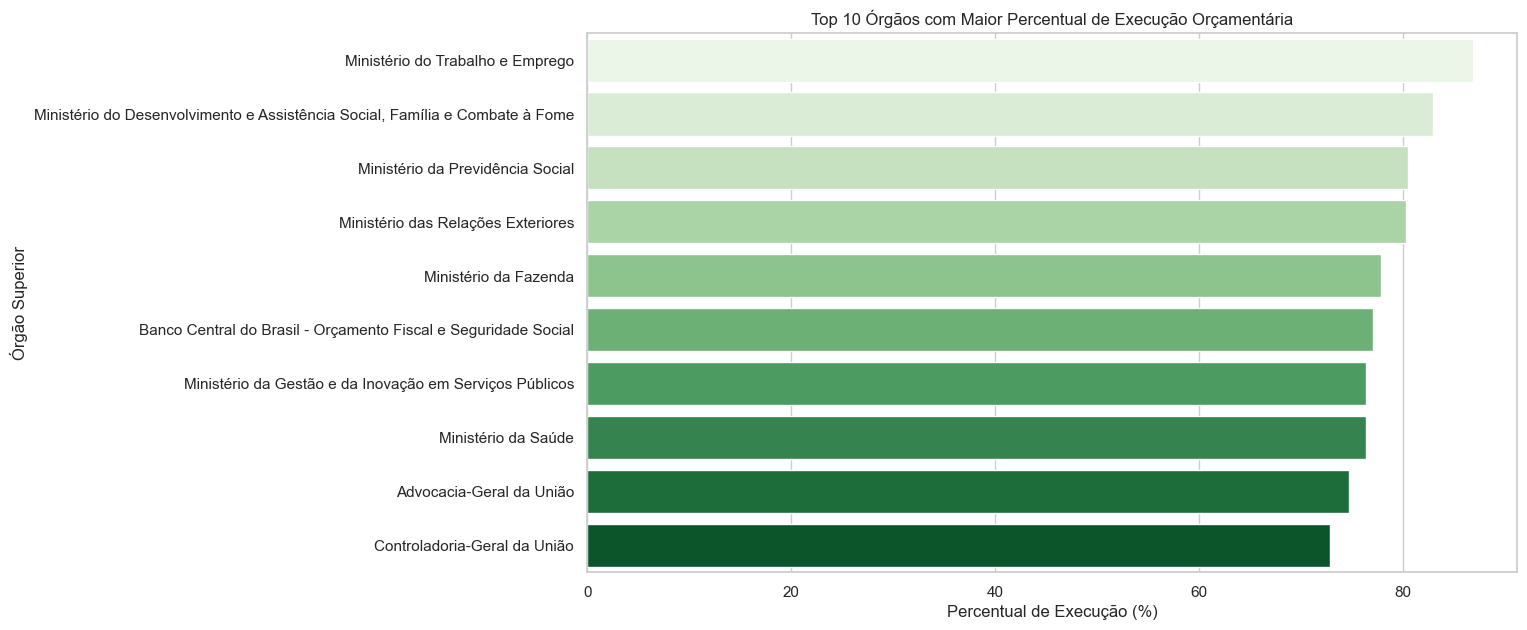

C:\Users\Lucas\AppData\Local\Temp\ipykernel_12092\3638954192.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


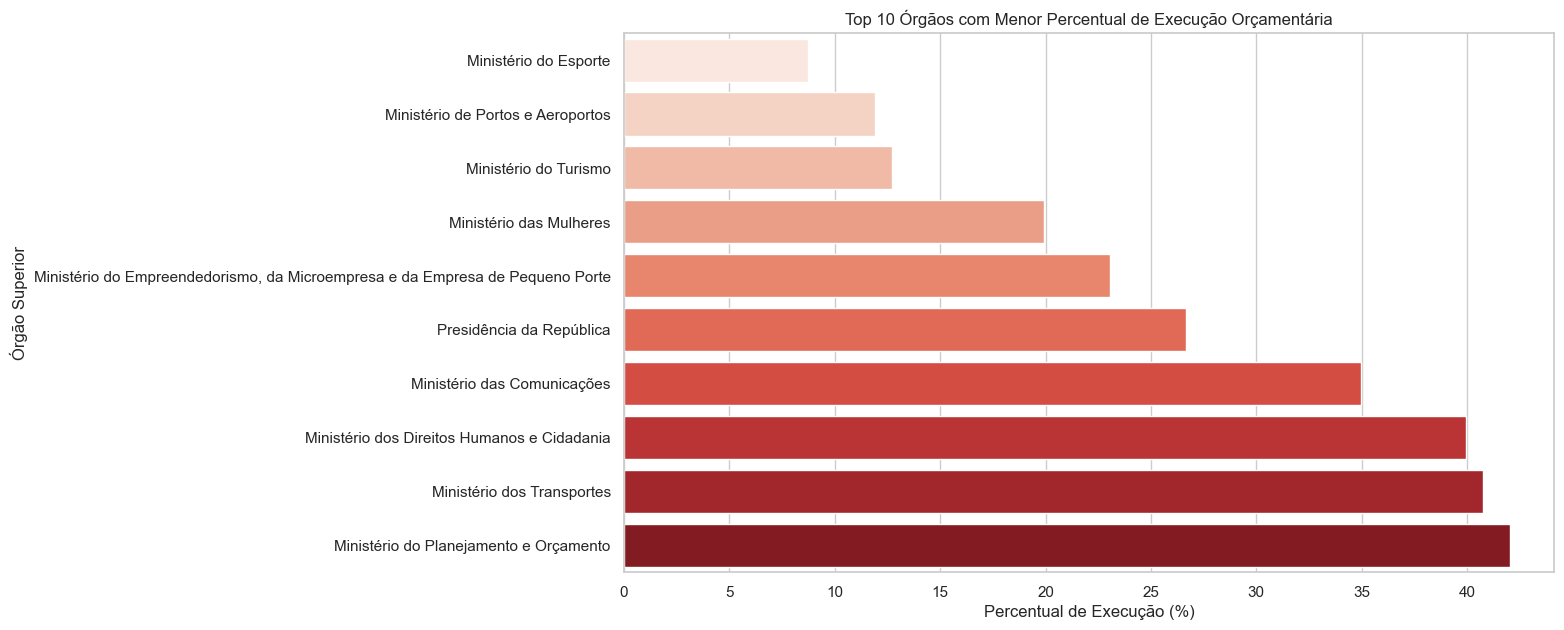

In [26]:
# ============================================================
# TOP 10 MELHORES EXECUTORES
# ============================================================

top10_maiores = (
    orc_por_orgao
    .sort_values("percentual_execucao", ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 7))
sns.barplot(
    data=top10_maiores,
    x="percentual_execucao",
    y=top10_maiores.index,
    palette="Greens"
)
plt.title("Top 10 Órgãos com Maior Percentual de Execução Orçamentária")
plt.xlabel("Percentual de Execução (%)")
plt.ylabel("Órgão Superior")
plt.show()


# ============================================================
# TOP 10 PIORES EXECUTORES
# ============================================================

top10_menores = (
    orc_por_orgao
    .sort_values("percentual_execucao", ascending=True)
    .head(10)
)

plt.figure(figsize=(12, 7))
sns.barplot(
    data=top10_menores,
    x="percentual_execucao",
    y=top10_menores.index,
    palette="Reds"
)
plt.title("Top 10 Órgãos com Menor Percentual de Execução Orçamentária")
plt.xlabel("Percentual de Execução (%)")
plt.ylabel("Órgão Superior")
plt.show()


In [27]:
orc_por_orgao.to_csv("orc_por_orgao_final.csv", index=True, encoding="utf-8-sig")
